In [2]:
import sys
sys.path

['/Users/gonakazawa/Documents/go/dev_environments/bayes_optimization',
 '/opt/homebrew/Cellar/python@3.10/3.10.8/Frameworks/Python.framework/Versions/3.10/lib/python310.zip',
 '/opt/homebrew/Cellar/python@3.10/3.10.8/Frameworks/Python.framework/Versions/3.10/lib/python3.10',
 '/opt/homebrew/Cellar/python@3.10/3.10.8/Frameworks/Python.framework/Versions/3.10/lib/python3.10/lib-dynload',
 '',
 '/opt/homebrew/Cellar/jupyterlab/3.4.8/libexec/lib/python3.10/site-packages',
 '/opt/homebrew/opt/six/lib/python3.10/site-packages',
 '/opt/homebrew/lib/python3.10/site-packages']

In [18]:
sys.path.append("/Users/gonakazawa/.pyenv/versions/3.10.6/lib/python3.10/site-packages")

In [ ]:
!pip install scikit-learn

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import datetime as dt
data = pd.DataFrame()

In [9]:
!ls

Untitled.ipynb                   note02_optimization.ipynb
data                             note03_experimental_design.ipynb
imgs                             note04_batchBO.ipynb
maro_cagedata.csv                ベイズ最適化.pdf
note01_regression.ipynb


In [31]:
maro = pd.read_csv('maro_cagedata.csv')
maro

,Date,temperature,humidity
0,2023-01-20 01:43,21.0,74
1,2023-01-20 02:43,20.9,74
2,2023-01-20 03:43,20.8,74
3,2023-01-20 04:43,20.7,74
4,2023-01-20 05:43,20.7,74
...,...,...,...
868,2023-02-25 05:43,23.0,64
869,2023-02-25 06:43,22.7,64
870,2023-02-25 07:43,22.8,64
871,2023-02-25 08:43,22.6,65


In [108]:
df = pd.DataFrame(maro)
df.head()

,Date,temperature,humidity,year,month,day,time,new_date
0,2023-01-20 01:43,21.0,74,2023,01,20,01,12001
1,2023-01-20 02:43,20.9,74,2023,01,20,02,12002
2,2023-01-20 03:43,20.8,74,2023,01,20,03,12003
3,2023-01-20 04:43,20.7,74,2023,01,20,04,12004
4,2023-01-20 05:43,20.7,74,2023,01,20,05,12005


In [109]:
df["year"] = df['Date'].str[:4]
df["month"] = df['Date'].str[5:7]
df["day"] = df['Date'].str[8:10]
df["time"] = df['Date'].str[11:13]
df

,Date,temperature,humidity,year,month,day,time,new_date
0,2023-01-20 01:43,21.0,74,2023,01,20,01,12001
1,2023-01-20 02:43,20.9,74,2023,01,20,02,12002
2,2023-01-20 03:43,20.8,74,2023,01,20,03,12003
3,2023-01-20 04:43,20.7,74,2023,01,20,04,12004
4,2023-01-20 05:43,20.7,74,2023,01,20,05,12005
...,...,...,...,...,...,...,...,...
868,2023-02-25 05:43,23.0,64,2023,02,25,05,22505
869,2023-02-25 06:43,22.7,64,2023,02,25,06,22506
870,2023-02-25 07:43,22.8,64,2023,02,25,07,22507
871,2023-02-25 08:43,22.6,65,2023,02,25,08,22508


In [110]:
#df["new_date"]=df['year'].str.cat(df['month'])
df["new_date"]=df['month'].str.cat(df['day'])
df["new_date"]=df['new_date'].str.cat(df['time'])
df["new_date"]=df['new_date'].astype(int)
df = df[290:]
df

,Date,temperature,humidity,year,month,day,time,new_date
290,2023-02-01 03:43,21.9,65,2023,02,01,03,20103
291,2023-02-01 04:43,22.2,64,2023,02,01,04,20104
292,2023-02-01 05:43,22.3,64,2023,02,01,05,20105
293,2023-02-01 06:43,22.2,65,2023,02,01,06,20106
294,2023-02-01 07:43,22.3,65,2023,02,01,07,20107
...,...,...,...,...,...,...,...,...
868,2023-02-25 05:43,23.0,64,2023,02,25,05,22505
869,2023-02-25 06:43,22.7,64,2023,02,25,06,22506
870,2023-02-25 07:43,22.8,64,2023,02,25,07,22507
871,2023-02-25 08:43,22.6,65,2023,02,25,08,22508


In [25]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 13.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 21.0 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 12.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.linear_model import LinearRegression

In [111]:
lr = LinearRegression()

X1 = df[['new_date']].values         # 説明変数（Numpyの配列）
Y = df[['temperature']].values         # 目的変数（Numpyの配列）

lr.fit(X1, Y)                        # 線形モデルの重みを学習

LinearRegression()

In [112]:
print('coefficient = ', lr.coef_[0]) # 説明変数の係数を出力
print('intercept = ', lr.intercept_) # 切片を出力

coefficient =  [0.00043149]
intercept =  [13.18477855]


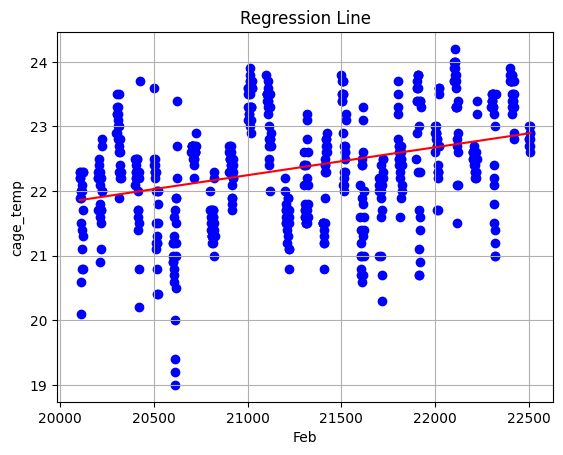

In [114]:
plt.scatter(X1, Y, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(X1, lr.predict(X1), color = 'red') # 回帰直線をプロット

plt.title('Regression Line')               # 図のタイトル
plt.xlabel('Feb') # x軸のラベル
plt.ylabel('cage_temp')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()                                 # 図の表示

(array([  5.,  14.,  31.,  61.,  89., 167., 212., 150., 104.,  40.]),
 array([18.8 , 19.34, 19.88, 20.42, 20.96, 21.5 , 22.04, 22.58, 23.12,
        23.66, 24.2 ]),
 <BarContainer object of 10 artists>)

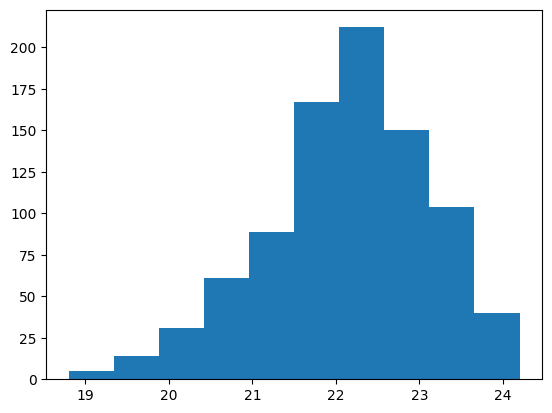

In [84]:
plt.hist(df['temperature'])

Scikit-learn で線形回帰
https://qiita.com/0NE_shoT_/items/08376b08783cd554b02e

【Python】日付型データから年・月・日を取り出す方法｜datetime
https://smart-hint.com/python/datetime-ymd/

pandasで文字列にスライスを適用して任意の位置・長さの部分を抽出
https://note.nkmk.me/python-pandas-str-combine/

pandas.DataFrameの複数の列の文字列を結合して新たな列を生成
https://note.nkmk.me/python-pandas-str-combine/